<a href="https://colab.research.google.com/github/Sharonayodele/neural_network_regression/blob/main/neuralnetwork_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##01. Neural network regression with Tensorflow
A regression problem is simply to predict a number
E.g Predict the prices of houses based on given features.
predict the cost of medical insurance.

I am going to use 2 exercises to practice all the steps involved in an end to end
regression model
- Exercise 1: predicting on simple test data(arithemtic progression)
- Exercise 2: regression problem on **the cost of medical insurance for individuals based on a number of different parameters


##Steps involved in an end to end deep learning project
1. import necessary dependencies
2. Study the data amd understand the problem
2. read and load the dataset
4. get the data ready/exploratory data analysis
5. Choose a model
    - create a model: split the dataset into training and test sets.
    - compile the model: loss functn, optimizer, evaluation metrics
    - fit the model: make predictions
6. evaluate the model
    - visualize the model
    - look at the training curve
7. improve the baseline model
8. save and load model
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Create data to view and fit

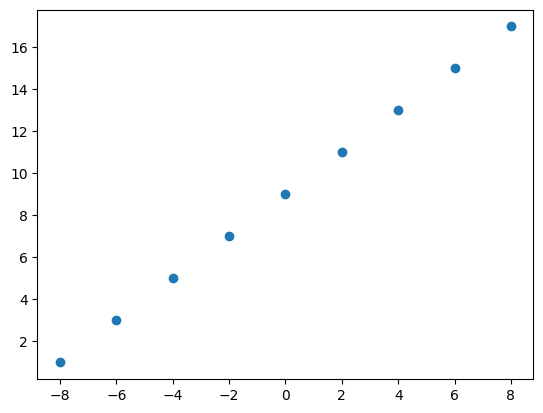

In [ ]:
X = np.array([-8., -6., -4., -2., 0, 2., 4., 6., 8.])  #features
y = np.array([1., 3., 5., 7., 9., 11., 13., 15., 17.,])  #labels

plt.scatter(X, y) #visualize it


In [ ]:
import tensorflow as tf


In [ ]:
#convert to tensors
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([9]), TensorShape([9]))

# First Regression model

In [ ]:
# set random seed for reproducibility
tf.random.set_seed(42)

#create amodel using the sequenrial API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)]
)

#compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics='mae')

#fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 426ms/step - loss: 9.0000 - mae: 9.0000
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 8.9900 - mae: 8.9900
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 8.9800 - mae: 8.9800
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 8.9700 - mae: 8.9700
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 8.9600 - mae: 8.9600


In [ ]:
# make a prediction
model_1.predict([10.])

1/1 [==============================] - 0s 67ms/step


array([[5.4437447]], dtype=float32)

#it didn't go well. it should've been 19.0
next we improve the model2

##How can we improve a model
- increase the dense layer: make it deeper
- increase the hidden units: make it wider
- hyperparparamter tuning
- train for longer

In [ ]:
# lets train for longer, epoch=100

tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics='mae')

#fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 220ms/step - loss: 9.6916 - mae: 9.6916
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6213 - mae: 9.6213
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 9.5836 - mae: 9.5836
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5460 - mae: 9.5460
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5083 - mae: 9.5083
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4707 - mae: 9.4707
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4330 - mae: 9.4330
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3954 - mae: 9.3954
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3577 - mae: 9.3577
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3201 - mae: 9.3201
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 9.28

In [ ]:
X,y

(<tf.Tensor: shape=(9,), dtype=float64, numpy=array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.])>,
 <tf.Tensor: shape=(9,), dtype=float64, numpy=array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17.])>)

In [ ]:
model_2.predict([10.])

1/1 [==============================] - 0s 64ms/step


array([[0.9664537]], dtype=float32)

obvio8sly, the model is better and closer to the actual value of 19.

## Evaluating a model
when it comes to evaluating models, the key word is visualize. It's a good ieda to visualizw
- the data
- the model
- the training model
- the prediction

Let's create a bigger data set, model and then evaluate it.

In [ ]:
X_1 =np.arange(-100, 100, 4) #from -100 to 100 with a step of 4
y_1 = np.arange(-80, 120, 4)
len(X_1), len(y_1)

(50, 50)

In [ ]:
#split the data into training/test set
X_1train = X_1[:40]
y_1train = y_1[:40]

y_1test = y_1[40:]
X_test = X_1[40:]
len(X_1train), len(y_1train), len(y_1test)

(40, 40, 10)

##Visualizing the data
let's plot our data

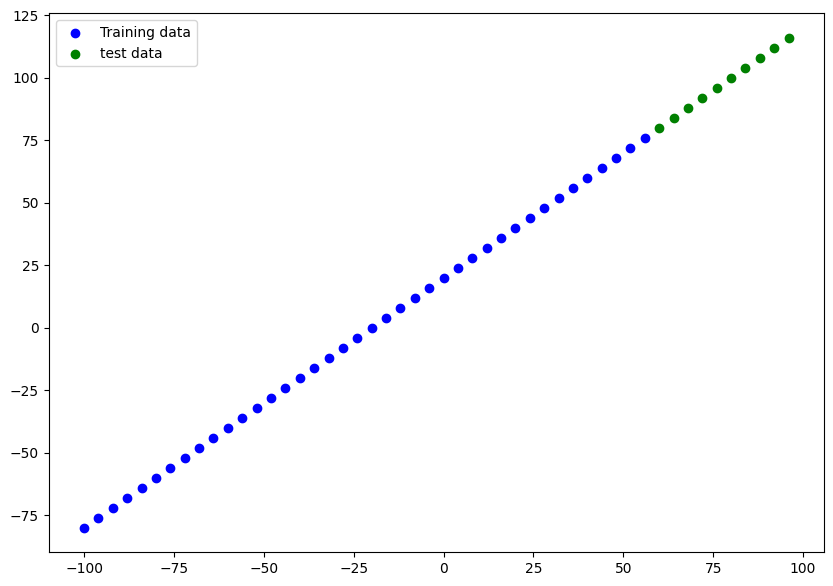

In [ ]:
plt.figure(figsize=(10, 7))
#plot training data in blue
plt.scatter(X_1train,y_1train, c='b', label='Training data' )
#plot test set in green
plt.scatter(X_test, y_1test, c='g', label='test data')

plt.legend()

Let's builld the model for the new data

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
#fit the model
model_2.fit(tf.expand_dims(X_1train, axis=-1), y_1train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 48.4542 - mae: 48.4542
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 21.6670 - mae: 21.6670
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 21.1772 - mae: 21.1772
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 17.8106 - mae: 17.8106
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7617 - mae: 18.7617
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 16.1807 - mae: 16.1807
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 15.1811 - mae: 15.1811
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 16.3792 - mae: 16.3792
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 23.9632 - mae: 23.9632
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5617 - mae: 18.5617
Epoch 11/100
2/2 [==============================] - 0s 6ms/

In [ ]:
#check the model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#show a 2D plot of the model

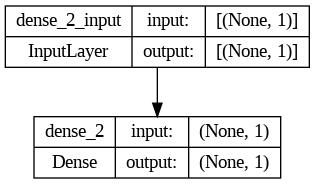

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_2, show_shapes=True)

##Plot predictions vs the ground truth
y_test vs y_prwed

In [ ]:
y_preds = model_2.predict(X_test)

1/1 [==============================] - 0s 35ms/step


In [ ]:
y_preds

array([[58.798832],
       [62.625587],
       [66.45234 ],
       [70.2791  ],
       [74.10586 ],
       [77.93261 ],
       [81.75936 ],
       [85.58612 ],
       [89.41288 ],
       [93.23963 ]], dtype=float32)

Since i'll be doing more visualization later, i'll create a function to make p[lots for my regression analysis

In [ ]:
from matplotlib import colors
def plot_function(train_data,
                 train_label,
                 test_data,
                 test_label,
                 predictions):

  """
  plots training data, test data against predictions
  """
  plt.figure(figsize=(7,7))
  # plot training data in blue
  plt.scatter(train_data, train_label, c='blue', label='training data')
  #plot test data in green
  plt.scatter(test_data, test_label, c='red', label='test data')
  #plot predictions
  plt.scatter(test_data, predictions, c='green', label='predictions')
  plt.legend()

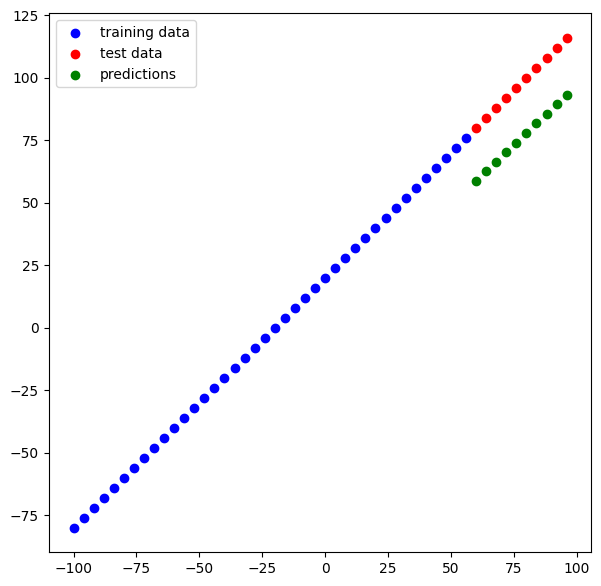

In [ ]:
plot_function(train_data=X_1train,
              train_label=y_1train,
              test_data=X_test,
              test_label=y_1test,
              predictions=y_preds)

the model's predictions aren't all that bad nor great.

# Evaluating predictions metrics

In [ ]:
# evaluate the model on the test set
model_2.evaluate(X_test, y_1test)

1/1 [==============================] - 0s 93ms/step - loss: 21.9808 - mae: 21.9808


[21.98076820373535, 21.98076820373535]

i used "mae" as the loss function and the metric so it returns them both

In [ ]:
y_1test.shape, y_preds.shape

((10,), (10, 1))

In [ ]:
# to get the mae & mse of the test data vs the prediction
tf.metrics.mae(y_1test, y_preds)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39.201168 , 35.374413 , 31.547663 , 27.720901 , 23.894142 ,
       20.06739  , 16.59251  , 13.848328 , 11.834848 , 10.5520735],
      dtype=float32)>

In [ ]:
tf.metrics.mse(y_1test, y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1668.7317 , 1383.349  , 1127.2549 ,  900.4484 ,  702.93005,
        534.7002 ,  395.75833,  286.1044 ,  205.73862,  154.6611 ],
      dtype=float32)>

Now we can improve the model by
- adding another dense layer: tf.keras.layers.dense(1), tf.keras,layers,dense(1)
- traininfg for longer= epochs=500

But ill rather work ona more complex model

# Saving a mdoel
model.save()
two ways to save models
1. Savedn=mdoel format: WILL SUFFICE MOST OF THE TIME
2. HDFS format



In [ ]:
model_2.save("best_model_Savemodel_format")

In [ ]:
!ls best_model_Savemodel_format/

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


# Loading a model
load_model

In [ ]:
# load the model save above
loaded_saved_model = tf.keras.models.load_model('best_model_Savemodel_format')
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#now lets test it out
saved_model_pred = loaded_saved_model.predict(X_test)
model_2_preds = model_2.predict(X_test)

tf.metrics.mae(y_1test, saved_model_pred) == tf.metrics.mae(y_1test, model_2_preds)

1/1 [==============================] - 0s 14ms/step


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

so evidently the saved and original models mae are all true. Now its time for a more complex model

## Nueral network Regression of a medical cost personal data set

link: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [ ]:
#import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# read the docu
med_data = pd.read_csv("https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv")

In [ ]:
med_data.head()

#tensorflow has an inbuilt feature to suggest charts for data visualization

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing
turning non nuimerical data into numbers
sex, smokers, region

>> get.dummies() method

In [ ]:
med_data_onehotencoded = pd.get_dummies(med_data)
med_data_onehotencoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
med_data_onehotencoded.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#check for NaN values
(1) Check for NaN under a single DataFrame column:
df['your column name'].isnull().values.any()

(2) Count the NaN under a single DataFrame column:
df['your column name'].isnull().sum()

(3) Check for NaN under an entire DataFrame:
df.isnull().values.any()

(4) Count the NaN under an entire DataFrame:
df.isnull().sum().sum()

In [ ]:
med_data_onehotencoded.isnull().values.any()

False

In [ ]:
#create X & y values
X = med_data_onehotencoded.drop("charges", axis=1)
#axis: o-horizontal, 1-vertical
y = med_data_onehotencoded['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#cerate training and split sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.2,
                                    random_state=42)


In [ ]:
len(X_train), len(X_test)

(1070, 268)

In [ ]:
len(y_train)

1070

In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
X_train.shape

(1070, 11)

Now we can build our model


In [ ]:
tf.random.set_seed(42)

#create the model
med_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compile the model
med_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics='mae')
med_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10275.2041 - mae: 10275.2041
Epoch 2/100
34/34 [==============================] - 0s 979us/step - loss: 7878.1177 - mae: 7878.1177
Epoch 3/100
34/34 [==============================] - 0s 880us/step - loss: 7573.3389 - mae: 7573.3389
Epoch 4/100
34/34 [==============================] - 0s 930us/step - loss: 7787.2422 - mae: 7787.2422
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7687.8569 - mae: 7687.8569
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7613.5723 - mae: 7613.5723
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7564.7109 - mae: 7564.7109
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7766.5918 - mae: 7766.5918
Epoch 9/100
34/34 [==============================] - 0s 990us/step - loss: 7587.0552 - mae: 7587.0552
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7684.6865 - mae:

In [ ]:
# Chweck the results of the model
med_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7298.0415 - mae: 7298.0415


[7298.04150390625, 7298.04150390625]

#model didnt do well. so we'll improve the model by:
- increase the layer
- increase the units
- change the optimizer

In [ ]:
tf.random.set_seed(42)

med_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)  #output layer
])

med_model1.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['mae'])

history = med_model1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13292.2988 - mae: 13292.2988
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13116.3203 - mae: 13116.3203
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12758.1182 - mae: 12758.1182
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12048.5439 - mae: 12048.5439
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10848.1787 - mae: 10848.1787
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9327.8965 - mae: 9327.8965
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8003.5449 - mae: 8003.5449
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7466.4648 - mae: 7466.4648
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7395.6777 - mae: 7395.6777
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7375.5674 - mae:

The SGD optimizer outputed NAN. This happens when the gradients beceoms too largwe or too small during training. So i switched to Adam() optimizer

In [ ]:
med_model_eval = med_model1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4596.0728 - mae: 4596.0728


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae'])

using a larger model and the adam optimizer results in half the error

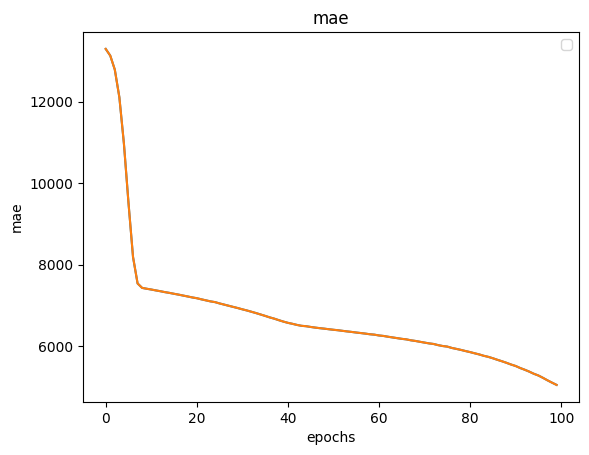

In [ ]:
# plot history (aka loss curve)
plt.plot(history.history['mae'])
plt.title('mae')
plt.ylabel('mae')
plt.xlabel('epochs')
plt.legend()

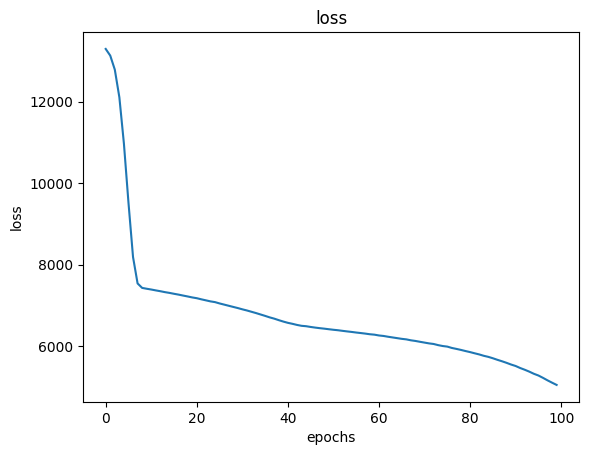

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

loss and mae are the same

<Axes: >

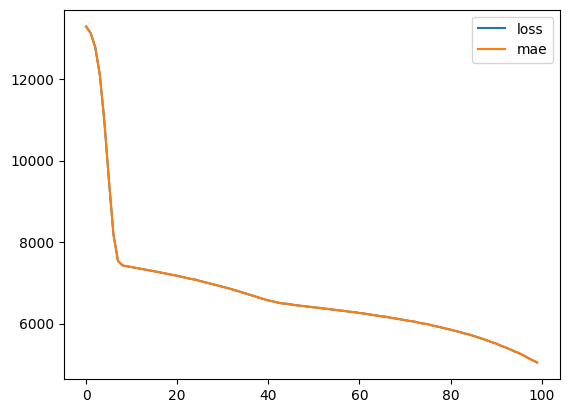

In [ ]:
# plotting loss with dataframe

pd.DataFrame(history.history).plot()

We can train for longer but let's try another mehtod of imporving our model.

# Normalization and Standardization
 Normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).
standardization which converts all of your data to unit variance and 0 mean.

In [ ]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
X_train.head()


In [ ]:
y_train.describe()

count     1070.000000
mean     13346.089736
std      12019.510778
min       1121.873900
25%       4897.667387
50%       9575.442100
75%      16746.657400
max      62592.873090
Name: charges, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)


In [ ]:
X_train_norm

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
pd.DataFrame(X_test_norm).head() #data has been normalized

,0,1,2,3,4,5,6,7,8,9,10
0,0.586957,0.233748,0.4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.369216,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.281560,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,0.249685,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.021739,0.422340,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train.loc[0]

age                 19.0
bmi                 27.9
children             0.0
sex_female           1.0
sex_male             0.0
smoker_no            0.0
smoker_yes           1.0
region_northeast     0.0
region_northwest     0.0
region_southeast     0.0
region_southwest     1.0
Name: 0, dtype: float64

In [ ]:
X_train_norm[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Another method of normalizing data
we normalize only X data

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker','region']))
# create X and y
X1 = med_data.drop('charges', axis=1)
y1 = med_data['charges']

#aplit the data
#X & Y must be arrnaged in the same order
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,
                                                    random_state=42)


#fit the column transformer on the trainig data only
#(doing so on test data would result in data leakage
ct.fit(X_train)


#transform trainig and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)






In [ ]:
len(y_train)

1070

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
len(y1), len(X1)

(1338, 1338)

Now let's create a model with the normalized data

In [ ]:
tf.random.set_seed(42)

med_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

med_model2.compile(loss=tf.keras.losses.MAE,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['mae'])

history1 = med_model2.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=200, verbose=0)

In [ ]:
#LETS EVALUATE
norm_model = pd.DataFrame(med_model2.evaluate(X_test_normal, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 3173.8821 - mae: 3173.8821


In [ ]:
med_model_eval

[4596.07275390625, 4596.07275390625]

In [ ]:
print('the loss/mae of our normalized data:', (norm_model))
print( '\nthe loss/mae of our unnormalized data', (med_model_eval))

the loss/mae of our normalized data:             0
0  3173.88208
1  3173.88208

the loss/mae of our unnormalized data [4596.07275390625, 4596.07275390625]


So normalization defintely improves the results of models.
Next we take on classification problems using neural networks